In [2]:
#GPU分配-按需分配
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config = config)

2022-11-10 22:30:19.161718: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
#导入数据集
import time
import numpy as np
np.random.seed(10)
import tensorflow as tf
import matplotlib.pyplot as plt
cifar10 = tf.keras.datasets.cifar10

In [4]:
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [5]:
#查看训练集和测试集大小
print("train data:",'images:',x_img_train.shape," labels:",y_label_train.shape)
print("test data:",'images:',x_img_test.shape," labels:",y_label_test.shape)
y_label_test.shape

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test data: images: (10000, 32, 32, 3)  labels: (10000, 1)


(10000, 1)

In [6]:
#定义标签字典
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}
y_label_test.shape

(10000, 1)

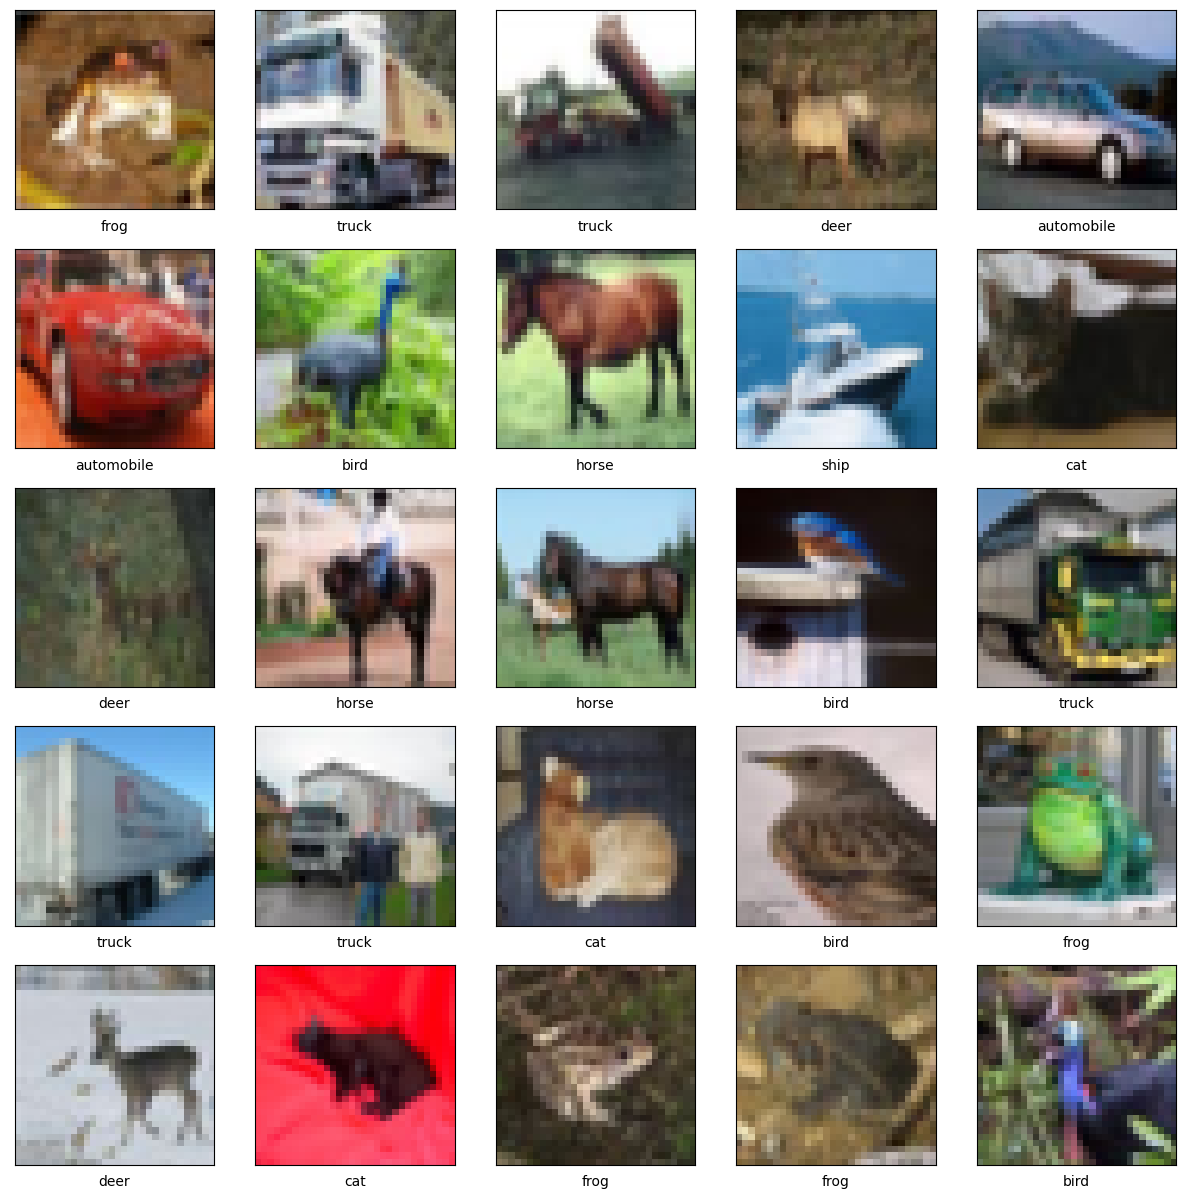

In [7]:
#查看前25个标签对应图片
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_img_train[i],cmap=plt.cm.binary)
    plt.xlabel(label_dict[y_label_train[i][0]])
plt.show()

In [8]:
#数据处理
x_img_train_normalize = x_img_train.astype('float32')/255.0
x_img_test_normalize = x_img_test.astype('float32')/255.0
y_label_train_onehot = tf.keras.utils.to_categorical(y_label_train)
y_label_test_onehot = tf.keras.utils.to_categorical(y_label_test)
y_label_test_onehot.shape

(10000, 10)

In [9]:
#模型搭建-Keras:Sequential
model = tf.keras.Sequential()
#第一次提取：卷积层+dropout层+池化层
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),padding='same',activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
#第二次提取
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
#MLP多层感知机
#平坦层
model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dropout(rate=0.3))
#隐藏层 设置1024个神经元
model.add(tf.keras.layers.Dense(1024,activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))
#输出层
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [10]:
#模型训练
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

t1=time.time()
train_history=model.fit(x_img_train_normalize, y_label_train_onehot,
                        validation_split=0.2,
                        epochs=40, batch_size=128, verbose=1)    
t2=time.time()
CNNfit = float(t2-t1)
print("Time taken: {} seconds".format(CNNfit))

Epoch 1/40
313/313 [==============================] - 29s 93ms/step - loss: 1.5657 - accuracy: 0.4375 - val_loss: 1.4069 - val_accuracy: 0.5540
Epoch 2/40
313/313 [==============================] - 29s 93ms/step - loss: 1.1778 - accuracy: 0.5796 - val_loss: 1.2309 - val_accuracy: 0.6079
Epoch 3/40
313/313 [==============================] - 29s 93ms/step - loss: 1.0157 - accuracy: 0.6405 - val_loss: 1.0828 - val_accuracy: 0.6678
Epoch 4/40
313/313 [==============================] - 29s 92ms/step - loss: 0.8979 - accuracy: 0.6845 - val_loss: 1.0215 - val_accuracy: 0.6747
Epoch 5/40
313/313 [==============================] - 29s 93ms/step - loss: 0.7951 - accuracy: 0.7204 - val_loss: 0.9510 - val_accuracy: 0.6912
Epoch 6/40
313/313 [==============================] - 28s 91ms/step - loss: 0.6938 - accuracy: 0.7560 - val_loss: 0.9026 - val_accuracy: 0.6979
Epoch 7/40
313/313 [==============================] - 29s 92ms/step - loss: 0.6079 - accuracy: 0.7861 - val_loss: 0.8737 - val_accuracy:

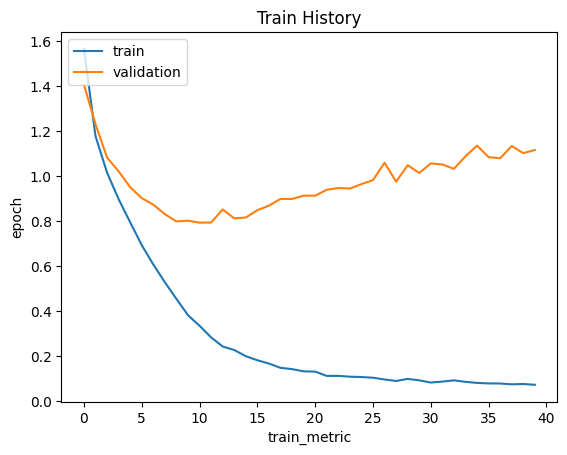

In [12]:
#可视化看看acc/loss和ecochs的关联
def vth(train_history,train_m,validation_m):
    plt.plot(train_history.history[train_m])
    plt.plot(train_history.history[validation_m])
    plt.title('Train History')
    plt.xlabel('train_metric')
    plt.ylabel('epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()
vth(train_history,'loss','val_loss')

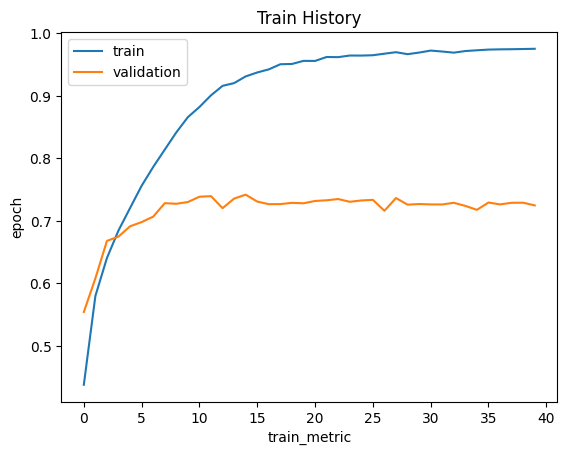

In [13]:
vth(train_history,'accuracy','val_accuracy')

In [14]:
scores = model.evaluate(x_img_test_normalize,y_label_test_onehot,verbose=0)
scores[1]

0.7257999777793884

In [15]:
model.save('model-0.h5')